In [ ]:
import pandas as pd
import numpy as np
import re
import string
import spacy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!python3 -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
pd.set_option('max_colwidth', 400)

### Набор данных
[
SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being **ham** (legitimate) or **spam**.

In [ ]:
data = pd.read_csv('spam_data.csv', encoding='iso-8859-1')[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

### Очистка

Стоп-слова для англиского языка в spaCy

In [ ]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
print(f'Spacy english stopwords size: {len(stopwords)}', end='\n\n')
' '.join(stopwords)

Spacy english stopwords size: 326



"without then 's top already namely being get anywhere may front another although third he noone seeming when across what such from herself amongst me our on amount much itself those it were something ‘d off in ’m whether did mostly does so thereby else will formerly into us am seems whole please became alone last along be always are ten towards six few most by should after ca quite fifteen onto ‘m though about doing ’s eight why within whoever again their up you 're using can whereas because a some since besides there whose ‘re five seem or anyone many whereby beyond rather meanwhile thru empty sometime all back 'd ’ve before wherein my least well your ever latter down behind forty never thence take now as nevertheless its becomes ours various anything too even any 'll and ‘ve ’ll of more own due if done nine thereupon here the except they toward his full ’re become becoming each thereafter ‘ll thus whatever out four yourself n’t often which same anyhow him hereafter sometimes hereupo

Атрибуты [Token](https://spacy.io/api/token#attributes)

In [ ]:
%%time

data['cleaned_text'] = data['text'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp(x) if 
        not token.is_stop 
        and not token.is_punct
        and not token.is_digit
        and not token.like_email
        and not token.like_num
        and not token.is_space
    )
)
data.sample(5)

CPU times: user 1min 2s, sys: 220 ms, total: 1min 2s
Wall time: 1min 13s


,label,text,cleaned_text
1459,1,Bought one ringtone and now getting texts costing 3 pound offering more tones etc,buy ringtone get text cost pound offer tone etc
2581,0,Yup i'm elaborating on the safety aspects and some other issues..,yup elaborate safety aspect issue
811,0,So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint,ring come guy costume gift future yowife hint hint
4260,0,Pls dont forget to study,pls not forget study
1020,0,"Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen",good afternoon glorious anniversary day sweet j hope find happy content prey think send teasing kiss sea coax image fond souvenier cougar pen


In [ ]:
data['cleaned_text'].iloc[3]

'u dun early hor u c'

### Bag of words

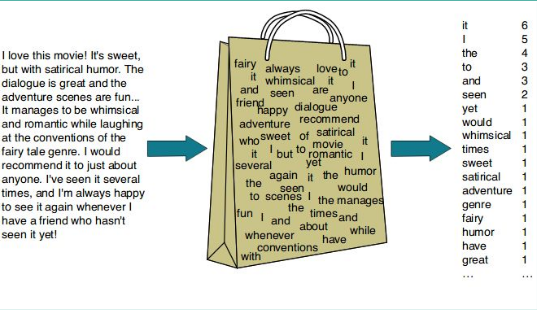

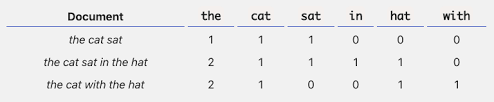

#### CountVectorizer

- приводит к нижнему регистру
- проводит токенизацию - `r"(?u)\b\w\w+\b"` (токены из 2 или более буквенно-цифровых символов, пунктуация полностью игнорируется и всегда рассматривается как разделитель токенов)
  - `(?u)` - флаг Unicode
  - `\b` - граница слова
  - `\w` - символы, которые могут входить в состав слов, включая числа и подчёркивание
  - `\+` - 1 и более повторений предшествующего выражения
- фильтрует стоп-слова

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

##### Стоп-слова

In [ ]:
print(f'Sklearn english stopwords size: {len(ENGLISH_STOP_WORDS)}', end='\n\n')
' '.join(ENGLISH_STOP_WORDS)

Sklearn english stopwords size: 318



'without then top already namely being get anywhere inc may front find another although etc thick third he noone seeming when across what con ie such from herself amongst me our on amount much itself those it were something off in eg whether mostly so thereby else will formerly into us am seems whole please became alone last along be always are ten towards six few most by should after cry fifteen onto though about eight why within whoever again their up you can whereas because a some since ltd besides there whose five seem or anyone many whereby beyond rather meanwhile thru hasnt empty sometime all back found before wherein my fire least well your ever latter down behind forty never thence take now as nevertheless its fill becomes ours anything too even any and bill of more own due if done nine thereupon here the except they toward his full become becoming each thereafter couldnt thus whatever out four yourself mill often which same anyhow him hereafter sometimes hereupon every only ev

Этот список английских стоп-слов взят из "Glasgow Information Retrieval Group". Оригинальный список:
http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words

##### Train/test split & fit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], random_state=2023)

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
vectorizer = CountVectorizer(max_df=0.7, min_df=0.003) # max_df фильтрует corpus-specific stop words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

##### Разреженное представление результата

Поскольку в большинстве документов обычно используется очень небольшое подмножество слов, используемых в корпусе, результирующая матрица будет иметь много нулевых значений признаков (обычно более 99% из них).

Чтобы оптимально хранить такую матрицу в памяти, а также ускорить алгебраические операции с матрицей/вектором, обычно используют разреженное представление, такое как реализации, доступные в пакете scipy.sparse.


[Sparse matrices (scipy.sparse)](https://docs.scipy.org/doc/scipy/reference/sparse.html)

**CSR** - Compressed Sparse Row

**COO** - COOrdinate format

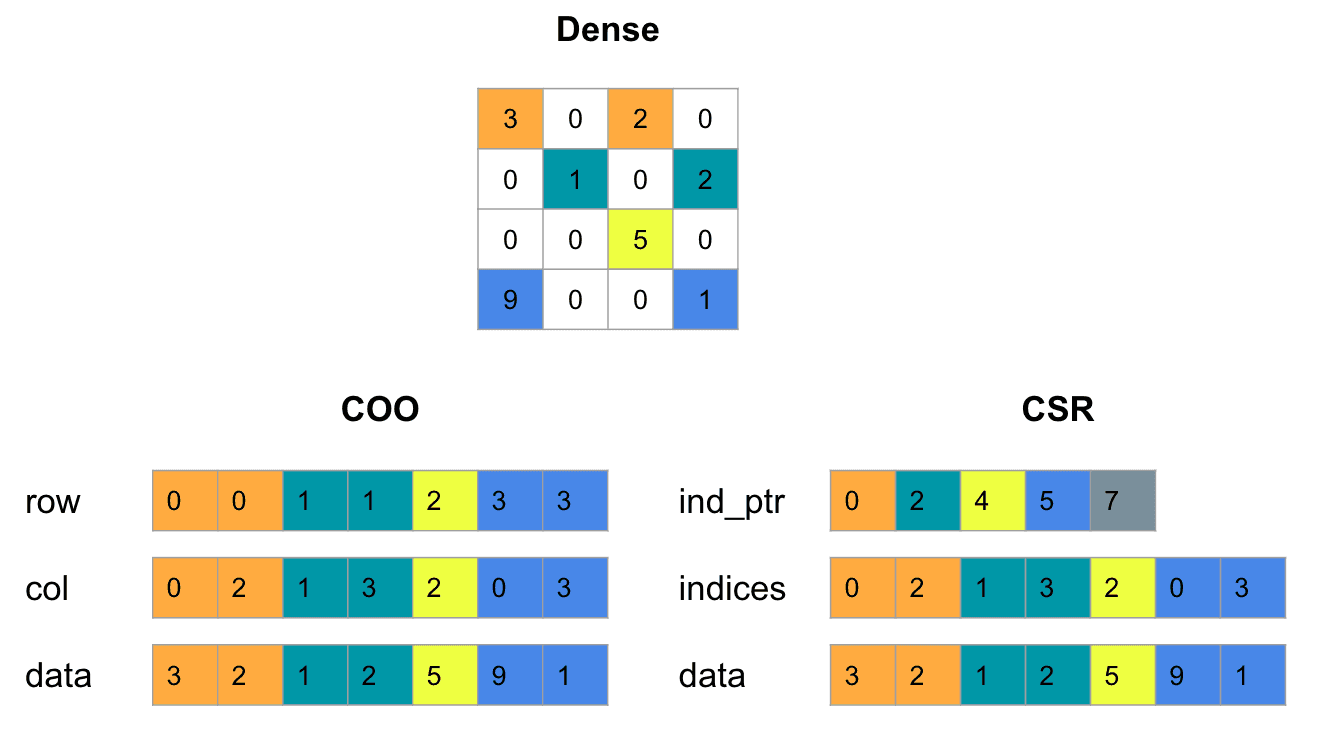

In [ ]:
X_train_vectorized

<4179x449 sparse matrix of type '<class 'numpy.int64'>'
	with 18002 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', '1000', '10p', '150p', '150ppm', '2000', '50',
       '500', '5000', 'able', 'abt', 'account', 'actually', 'add',
       'address', 'aft', 'afternoon', 'ah', 'aight', 'alright', 'amp',
       'answer', 'anytime', 'apply', 'ard', 'ask', 'attempt', 'await',
       'award', 'away', 'babe', 'baby', 'bad', 'beautiful', 'bed',
       'believe', 'big', 'birthday', 'bit', 'bonus', 'book', 'bored',
       'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bt', 'bus',
       'busy', 'buy', 'call', 'camera', 'car', 'card', 'care', 'cash',
       'cause', 'chance', 'change', 'charge', 'chat', 'check', 'chikku',
       'choose', 'claim', 'class', 'close', 'co', 'code', 'collect',
       'collection', 'colour', 'com', 'come', 'confirm', 'contact',
       'cool', 'cos', 'cost', 'coz', 'crazy', 'credit', 'cs', 'cum',
       'customer', 'da', 'dad', 'darlin', 'dat', 'date', 'day', 'de',
       'dear', 'decide', 'decimal', 'delivery', 'den', 'detail', 'dinner',
       'dis'

In [ ]:
pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out()).head()

,000,10,100,1000,10p,150p,150ppm,2000,50,500,...,xxx,ya,yeah,year,yes,yesterday,yo,you,yup,ìï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Бейзлайн

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Константное предсказание

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train_vectorized, y_train)
preds = dummy_clf.predict(X_test_vectorized)
print(classification_report(y_test, preds, zero_division=0)) # Стандартные метрики классификации

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1207
           1       0.00      0.00      0.00       186

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



Логистическая регрессия

In [ ]:
logreg = LogisticRegression().fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.97      0.82      0.89       186

    accuracy                           0.97      1393
   macro avg       0.97      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



##### Переопределение токенизатора, препроцессинга

In [ ]:
def custom_tokenize(text):
  text = re.sub(r'[^a-zA-Z ]', '', text)
  return text.split()

In [ ]:
custom_vectorizer = CountVectorizer(
    max_df=0.7, 
    min_df=0.003, 
    tokenizer=custom_tokenize, # аналогично можно переопределить preprocessor
) 
X_train_vectorized = custom_vectorizer.fit_transform(X_train)
X_test_vectorized = custom_vectorizer.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_vectorized

<4179x445 sparse matrix of type '<class 'numpy.int64'>'
	with 18708 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_vectorized.toarray(), columns=custom_vectorizer.get_feature_names_out()).head()

,able,abt,account,actually,add,address,aft,afternoon,age,ah,...,xmas,xxx,y,ya,yeah,year,yes,yesterday,yo,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
logreg = LogisticRegression().fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1207
           1       0.99      0.83      0.90       186

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



### Tf-Idf

В объемном корпусе некоторые слова будут присутствовать в большом количестве документов (текстов), а значит, они несут очень мало значимой информации о фактическом содержании документа. 

Для решения этой проблемы можно использовать Tf-Idf подход

Цель использования tf-idf состоит в том, чтобы уменьшить влияние токенов, которые очень часто встречаются в данном корпусе и, следовательно, эмпирически менее информативны, чем признаки, которые встречаются малой части корпуса



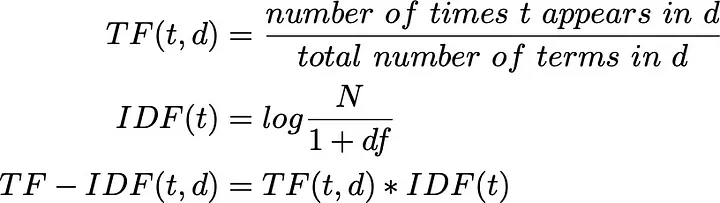

Можно заметить, что **term-frequency** изменяется в диапазоне [0, 1]

тогда как без логарифмирования **inverse document-frequency** - [1, N + 1]

#### Отличия в реализации Sklearn

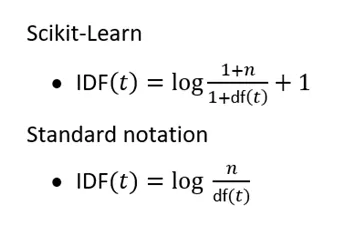

Также в Scikit-Learn результирующие векторы TF-IDF нормализуются по евклидовой норме, что облегчает расчет cosine similarity:
`The cosine similarity between two vectors is their dot product when l2 norm has been applied`

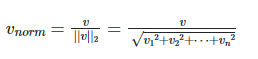

#### TfidfTransformer vs  TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.pipeline import Pipeline

**TfidfTransformer** преобразует матрицу из CountVectorizer в tf-idf

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       0.99      0.70      0.82       186

    accuracy                           0.96      1393
   macro avg       0.97      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



**TfidfVectorizer** работает end-to-end

In [ ]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       0.99      0.70      0.82       186

    accuracy                           0.96      1393
   macro avg       0.97      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



#### Оптимизация гиперпараметров пайплайна целиком - HalvingGridSearchCV

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
parameter_grid = {
    "counter__max_df": np.linspace(0.5, 0.9, 10),
    "counter__min_df": [0.001, 0.003, 0.005],
    "counter__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "tfidf__norm": ("l1", "l2"),
    "clf__C": np.linspace(0.1, 1, 10),
}

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=2023,
    error_score='raise'
)
grid_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 20
max_resources_: 4179
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1200
n_resources: 20
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
----------
iter: 1
n_candidates: 400
n_resources: 60
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
----------
iter: 2
n_candidates: 134
n_resources: 180
Fitting 5 folds for each of 134 candidates, totalling 670 fits
----------
iter: 3
n_candidates: 45
n_resources: 540
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 4
n_candidates: 15
n_resources: 1620
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: user 15.2 s, sys: 481 ms, total: 15.7 s
Wall time: 2min 4s


HalvingGridSearchCV(error_score='raise',
                    estimator=Pipeline(steps=[('counter', CountVectorizer()),
                                              ('tfidf', TfidfTransformer()),
                                              ('clf', LogisticRegression())]),
                    n_jobs=-1,
                    param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                'counter__max_df': array([0.5       , 0.54444444, 0.58888889, 0.63333333, 0.67777778,
       0.72222222, 0.76666667, 0.81111111, 0.85555556, 0.9       ]),
                                'counter__min_df': [0.001, 0.003, 0.005],
                                'counter__ngram_range': ((1, 1), (1, 2)),
                                'tfidf__norm': ('l1', 'l2')},
                    random_state=2023, scoring='accuracy', verbose=1)

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)

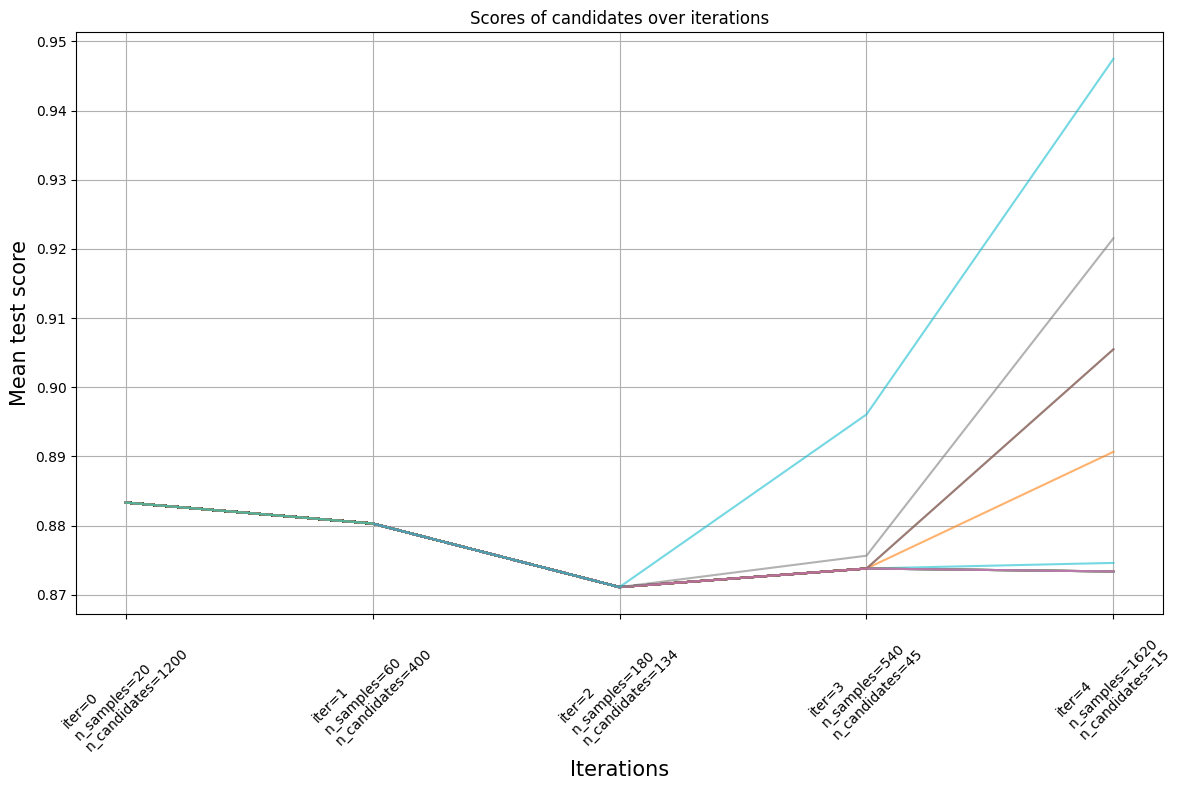

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", 
    columns="params_str",
     values="mean_test_score",
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={grid_search.n_resources_[i]}\nn_candidates={grid_search.n_candidates_[i]}"
    for i in range(grid_search.n_iterations_)
]

ax.set_xticks(range(grid_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("Mean test score", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
grid_search.best_score_

0.9474907311852616

In [ ]:
preds = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.99      0.77      0.87       186

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.92      1393
weighted avg       0.97      0.97      0.97      1393



#### Визуализация & Интерпретация 

##### ELI5

[eli5](https://eli5.readthedocs.io/en/latest/) - Python-библиотека, которая позволяет визуализировать различные модели машинного обучения с использованием унифицированного API.

In [ ]:
!pip install eli5

In [ ]:
import eli5

In [ ]:
grid_search.best_estimator_['clf']

LogisticRegression()

In [ ]:
eli5.show_weights(
    estimator=grid_search.best_estimator_['clf'], 
    feature_names=list(grid_search.best_estimator_['counter'].get_feature_names_out()),
    top=(50, 5)
)

Weight?,Feature
+4.395,txt
+3.863,claim
+3.725,mobile
+3.433,www
+3.296,150p
+3.177,win
+3.075,free
+3.052,service
+2.920,stop
+2.874,50
